In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

eps=2
k = lambda x, y: np.exp(-np.linalg.norm(x - y)**2/eps)

In [52]:
sns.set_palette("Set1")

In [112]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, centers=3, center_box=(-1, 1), cluster_std=0.05)
sorted_index = np.argsort(y)

X = X[sorted_index]
y = y[sorted_index]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [96]:
sorted_

NameError: name 'sorted_' is not defined

<AxesSubplot:>

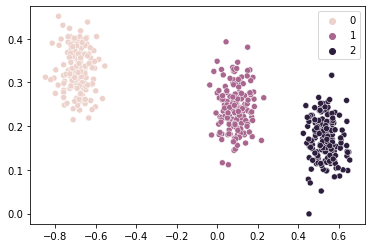

In [97]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [98]:
K = np.array([[k(x, y) for x in X] for y in X])
K

array([[1.        , 0.99995106, 0.99789245, ..., 0.47027554, 0.50614298,
        0.49834818],
       [0.99995106, 1.        , 0.99720508, ..., 0.47237634, 0.50809016,
        0.5004977 ],
       [0.99789245, 0.99720508, 1.        , ..., 0.45267236, 0.489287  ,
        0.48030134],
       ...,
       [0.47027554, 0.47237634, 0.45267236, ..., 1.        , 0.99717464,
        0.99883833],
       [0.50614298, 0.50809016, 0.489287  , ..., 0.99717464, 1.        ,
        0.99889268],
       [0.49834818, 0.5004977 , 0.48030134, ..., 0.99883833, 0.99889268,
        1.        ]])

In [99]:
d = np.sum(K, axis=1)

In [100]:
p = (K.T/d).T

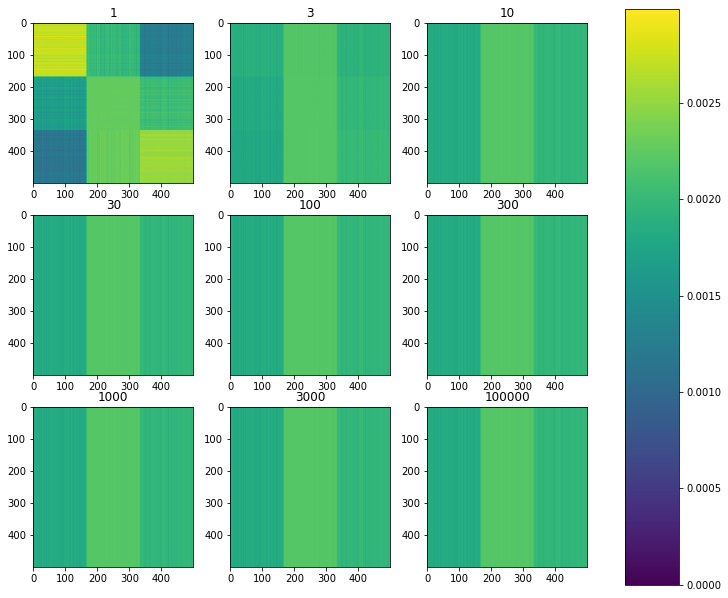

In [113]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for power, ax in zip([1, 3, 10, 30, 100, 300, 1000, 3000, 100000], axes.ravel()):
    plt.sca(ax)
    plt.imshow(np.linalg.matrix_power(p, power), vmin=0, vmax=np.max(p))
    plt.title(f"{power}")

cax = plt.axes([0.95, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)

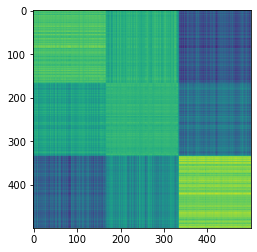

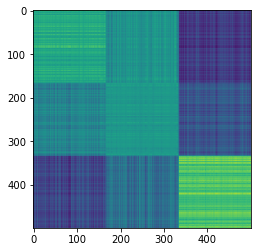

In [88]:
plt.imshow(p**2)

In [128]:
l, phi = np.linalg.eig(p)

sorted_index_eig = np.argsort(l)[::-1]
l = l[sorted_index_eig]
phi = phi[sorted_index_eig]

def diffusion(t, i, j):
    return np.sqrt(np.real(np.sum(l**(2*t)*(phi[i, :] - phi[j, :])**2)))

In [130]:
D = [[diffusion(1, i, j) for i in range(500)] for j in range(500)]

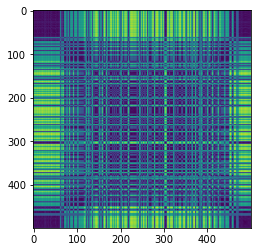

In [131]:
plt.imshow(D)

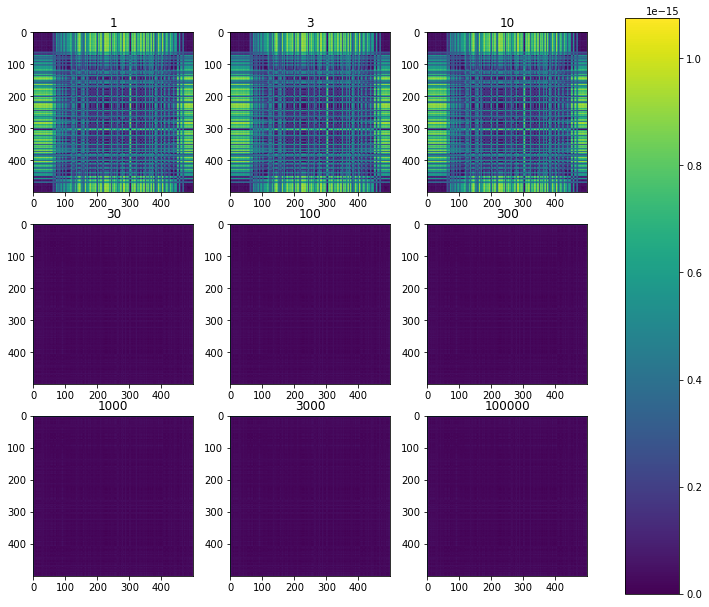

In [132]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for t, ax in zip([1, 3, 10, 30, 100, 300, 1000, 3000, 100000], axes.ravel()):
    plt.sca(ax)
    plt.imshow([[diffusion(t, i, j) for i in range(500)] for j in range(500)])
    plt.title(f"{t}")

cax = plt.axes([0.95, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)